In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'c:\program files\python37\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'c:\program files\python37\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'c:\program files\python37\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

#Funciones Generales:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

# Configuraciones:

## Colores

In [3]:
COLOR_ALTO = (237,248,177)
COLOR_MEDIO = (127,205,187)
COLOR_BAJO =(44,127,184)


#No modificar
color_parser = lambda x: x/255

COLOR_ALTO = list(map(color_parser,COLOR_ALTO))
COLOR_MEDIO = list(map(color_parser,COLOR_MEDIO))
COLOR_BAJO = list(map(color_parser,COLOR_BAJO))

## Tamaño de Fuentes

In [4]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Formato de guardado

In [12]:
FORMATO_GUARDADO = 'svg' #Se puede usar png, jpg, svg

# Graficas de validacíon de RF

## Importancia

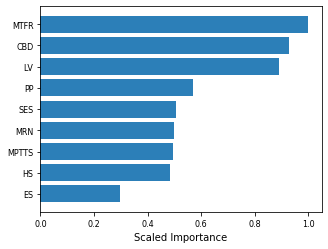

In [5]:
BASE_GRAFICA_CM = 12.8
ALTURA_GRAFICA_CM = 9.6

DATA = np.array([['CBD',0.9292],['LV',0.8904],['SES',0.5058],['MTFR',1],['MRN',0.5005],['MPTTS',0.4935],['HS',0.4845],['PP',0.5678],['ES',0.2969]])
DATA = np.array(sorted(DATA,key=lambda x: x[1]))
fig, ax = plt.subplots(figsize=cm2inch(BASE_GRAFICA_CM, ALTURA_GRAFICA_CM))
people = DATA[:,0]
y_pos = np.arange(len(people))

performance = DATA[:,1].astype(float)



ax.barh(y_pos, performance, align='center',color = COLOR_BAJO)
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.set_xlabel('Scaled Importance')
#ax.set_title('Variable Importance')
plt.savefig('Variable_Importance.'+FORMATO_GUARDADO) #NOMBRE DE ARCHIVO DE GUARDADO (USAR SVG PARA CALIDAD COMPLETA O PNG PARA CALIDAD NORMAL)

## Numero de Árboles

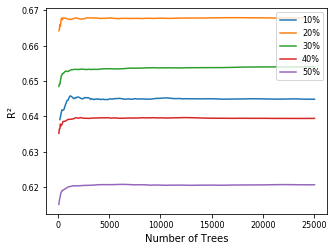

In [6]:
BASE_GRAFICA_CM = 12.8
ALTURA_GRAFICA_CM = 9.6

porcentajes = [10,20,30,40,50]
data = []
fig, ax = plt.subplots(figsize=cm2inch(BASE_GRAFICA_CM, ALTURA_GRAFICA_CM))
for i in porcentajes:
    data.append(np.loadtxt(format(i)+'.txt'))
    ax.plot(data[-1][:,0],data[-1][:,1],label=format(i)+'%')
#plt.title('Sensitivity Iterations for Number of Trees')  #TITULO DE LA GRÁFICA
plt.xlabel('Number of Trees') #RÓTULO EJE X
plt.ylabel('R²') #RÓTULO EJE Y
plt.legend(loc="upper right")
plt.savefig('Number_Trees.'+FORMATO_GUARDADO) #NOMBRE DE ARCHIVO DE GUARDADO (USAR SVG PARA CALIDAD COMPLETA O PNG PARA CALIDAD NORMAL)

## Validación

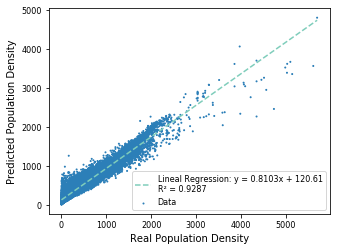

In [7]:
BASE_GRAFICA_CM = 12.8
ALTURA_GRAFICA_CM = 9.6

data = np.loadtxt('validation.csv',delimiter=',')
fig, ax = plt.subplots(figsize=cm2inch(BASE_GRAFICA_CM, ALTURA_GRAFICA_CM))

X = data[:,0]
Y = data[:,1]
TAMAÑO_PUNTO = [1]*len(X)
ax.scatter(X,Y,label='Data',s = TAMAÑO_PUNTO,color = COLOR_BAJO)
X = np.linspace(np.min(X),np.max(X),2)
m, b = [0.8103,120.61]
plt.plot(X, m*X + b,'--',color=(127/255,205/255,187/255),label='Lineal Regression: y = ' + format(m) + 'x + ' + format(b) + '\n' + r'R² = 0.9287')
#plt.title('SUR Random Forest Model Validation')  #TITULO DE LA GRÁFICA
plt.xlabel('Real Population Density') #RÓTULO EJE X
plt.ylabel('Predicted Population Density') #RÓTULO EJE Y
plt.legend()
plt.savefig('validation.'+FORMATO_GUARDADO) #NOMBRE DE ARCHIVO DE GUARDADO (USAR SVG PARA CALIDAD COMPLETA O PNG PARA CALIDAD NORMAL)

# Histogramas

## Densidad

### ESCENARIO 1

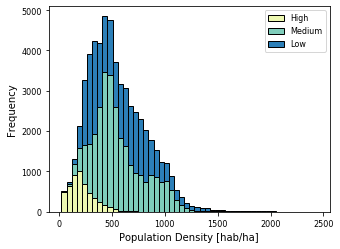

In [8]:
BASE_GRAFICA_CM = 12.8
ALTURA_GRAFICA_CM = 9.6


fig, ax = plt.subplots(figsize=cm2inch(BASE_GRAFICA_CM, ALTURA_GRAFICA_CM))

bins = 50  #NUMERO DE BARRAS DEL HISTOGRAMA
FILE = 'E1.csv'  #ARCHIVO DE RESULTADOS
df = pd.read_csv(FILE)
cex = df['SES']=='ALTO'
cex1 = df['SES']=='MEDIO'
cex2 = df['SES']=='BAJO'

exx = df['DensPob_Pr'].values[cex]
exx1 = df['DensPob_Pr'].values[cex1]
exx2 = df['DensPob_Pr'].values[cex2]

DATA = np.array([exx,exx1,exx2])
labels = ['High','Medium','Low']  #LABELS DE LA LEYENDA
ax.hist(DATA, stacked=True,color=[COLOR_ALTO,COLOR_MEDIO,COLOR_BAJO],bins = int(bins),edgecolor = 'black',label=labels)



#plt.title('Histogram of Population Density for Scenario 1')  #TITULO DE LA GRÁFICA

ax.set_xlabel('Population Density [hab/ha]') #RÓTULO EJE X
ax.set_ylabel('Frequency') #RÓTULO EJE Y
ax.legend(loc="upper right")
plt.savefig('E1DENS.'+FORMATO_GUARDADO) #NOMBRE DE ARCHIVO DE GUARDADO (USAR SVG PARA CALIDAD COMPLETA O PNG PARA CALIDAD NORMAL)

### ESCENARIO 2

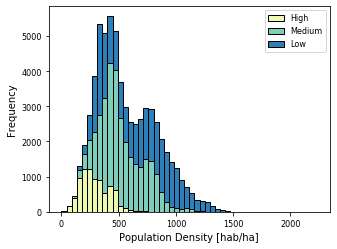

In [9]:
BASE_GRAFICA_CM = 12.8
ALTURA_GRAFICA_CM = 9.6


fig, ax = plt.subplots(figsize=cm2inch(BASE_GRAFICA_CM, ALTURA_GRAFICA_CM))

bins = 50  #NUMERO DE BARRAS DEL HISTOGRAMA
FILE = 'E2.csv'  #ARCHIVO DE RESULTADOS
df = pd.read_csv(FILE)
cex = df['SES']=='ALTO'
cex1 = df['SES']=='MEDIO'
cex2 = df['SES']=='BAJO'

exx = df['DensPob_Pr'].values[cex]
exx1 = df['DensPob_Pr'].values[cex1]
exx2 = df['DensPob_Pr'].values[cex2]

DATA = np.array([exx,exx1,exx2])
labels = ['High','Medium','Low']  #LABELS DE LA LEYENDA
ax.hist(DATA, stacked=True,color=[COLOR_ALTO,COLOR_MEDIO,COLOR_BAJO],bins = int(bins),edgecolor = 'black',label=labels)


#plt.title('Histogram of Population Density for Scenario 2')  #TITULO DE LA GRÁFICA


ax.set_xlabel('Population Density [hab/ha]') #RÓTULO EJE X
ax.set_ylabel('Frequency') #RÓTULO EJE Y
ax.legend(loc="upper right")
plt.savefig('E2DENS.'+FORMATO_GUARDADO) #NOMBRE DE ARCHIVO DE GUARDADO (USAR SVG PARA CALIDAD COMPLETA O PNG PARA CALIDAD NORMAL)

## Viajes

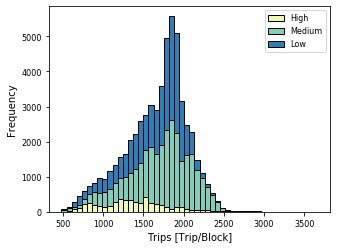

In [10]:
BASE_GRAFICA_CM = 12.8
ALTURA_GRAFICA_CM = 9.6


fig, ax = plt.subplots(figsize=cm2inch(BASE_GRAFICA_CM, ALTURA_GRAFICA_CM))


bins = 50 #NUMERO DE BARRAS DEL HISTOGRAMA
df = pd.read_csv('E1.csv') #ARCHIVO DE RESULTADOS
cex = df['SES']=='ALTO'
cex1 = df['SES']=='MEDIO'
cex2 = df['SES']=='BAJO'

exx = df['VAIAJES'].values[cex]
exx1 = df['VAIAJES'].values[cex1]
exx2 = df['VAIAJES'].values[cex2]
DATA = np.array([exx,exx1,exx2])
labels = ['High','Medium','Low'] #LABELS DE LA LEYENDA
ax.hist(DATA, stacked=True,color=[COLOR_ALTO,COLOR_MEDIO,COLOR_BAJO],bins = int(bins),edgecolor = 'black',label=labels)
#plt.title('Histogram of Trips for Scenario 1') #TITULO DE LA GRÁFICA
ax.set_xlabel('Trips [Trip/Block]') #RÓTULO EJE X

ax.set_ylabel('Frequency') #RÓTULO EJE Y

ax.legend(loc="upper right")

plt.savefig('E1TRIPS.'+FORMATO_GUARDADO) #NOMBRE DE ARCHIVO DE GUARDADO (USAR SVG PARA CALIDAD COMPLETA O PNG PARA CALIDAD NORMAL)

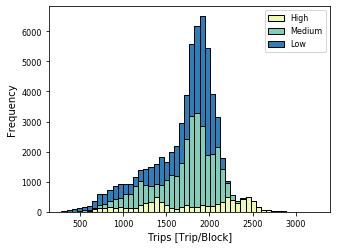

In [11]:
BASE_GRAFICA_CM = 12.8
ALTURA_GRAFICA_CM = 9.6


fig, ax = plt.subplots(figsize=cm2inch(BASE_GRAFICA_CM, ALTURA_GRAFICA_CM))

bins = 50 #NUMERO DE BARRAS DEL HISTOGRAMA
df = pd.read_csv('E2.csv') #ARCHIVO DE RESULTADOS
cex = df['SES']=='ALTO'
cex1 = df['SES']=='MEDIO'
cex2 = df['SES']=='BAJO'

exx = df['VAIAJES'].values[cex]
exx1 = df['VAIAJES'].values[cex1]
exx2 = df['VAIAJES'].values[cex2]
DATA = np.array([exx,exx1,exx2])
labels = ['High','Medium','Low'] #LABELS DE LA LEYENDA
ax.hist(DATA, stacked=True,color=[COLOR_ALTO,COLOR_MEDIO,COLOR_BAJO],bins = int(bins),edgecolor = 'black',label=labels)
#plt.title('Histogram of Trips for Scenario 2') #TITULO DE LA GRÁFICA
ax.set_xlabel('Trips [Trip/Block]') #RÓTULO EJE X
ax.set_ylabel('Frequency') #RÓTULO EJE Y
ax.legend(loc="upper right")
plt.savefig('E2TRIPS.'+FORMATO_GUARDADO) #NOMBRE DE ARCHIVO DE GUARDADO (USAR SVG PARA CALIDAD COMPLETA O PNG PARA CALIDAD NORMAL)